# HSE 2023: Mathematical Methods for Data Analysis

## Homework 5

### Contents

#### PCA, t-SNE – 4 points
* [Task 1](#task1) (1.5 points)
* [Task 2](#task2) (0.5 points)
* [Task 3](#task3) (0.5 points)
* [Task 4](#task3) (1 points)
* [Task 5](#task4) (0.5 points)

#### Clustering – 6 points
* [Task 5](#task5) (1.5 points)
* [Task 6](#task6) (1.5 points)
* [Task 7](#task7) (1.5 points)
* [Task 8](#task8) (0.5 point)
* [Task 9](#task8) (1 point)

Load the file `data_Mar_64.txt`.

In [ ]:
import pandas as pd
data = pd.read_csv('data_Mar_64.txt', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,Acer Campestre,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,...,0.011719,0.000000,0.005859,0.035156,0.027344,0.033203,0.001953,0.000000,0.017578,0.0
1,Acer Campestre,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,...,0.017578,0.000000,0.021484,0.017578,0.046875,0.005859,0.003906,0.003906,0.046875,0.0
2,Acer Campestre,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,...,0.035156,0.000000,0.015625,0.021484,0.056641,0.009766,0.003906,0.000000,0.015625,0.0
3,Acer Campestre,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,...,0.015625,0.001953,0.021484,0.029297,0.033203,0.003906,0.000000,0.001953,0.027344,0.0
4,Acer Campestre,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,...,0.023438,0.001953,0.021484,0.048828,0.056641,0.019531,0.000000,0.000000,0.013672,0.0


This [dataset](https://archive.ics.uci.edu/dataset/241/one+hundred+plant+species+leaves+data+set) consists of work carried out by James Cope, Charles Mallah, and James Orwell, Kingston University London. The Leaves were collected in the Royal Botanic Gardens, Kew, UK.

For Each feature, a 64 element vector is given per sample of leaf. One file for each 64-element feature vectors. **Each row begins with the class label**. Here is the plant leaf **classification task**. The remaining 64 elements is the feature vector.

In [ ]:
#Sixteen samples of leaf each of one-hundred plant species
data.shape

(1600, 65)

The first column is the target, put it in a separate variable.

In [ ]:
import numpy as np

X, y_name = np.array(data.iloc[:, 1:]), data.iloc[:, 0]

**Task 1. <a id="task1"></a> (1.5 points)** Let's do the following pipeline (detailed instructions will be in next cells)

- Encode your textual target.
- Split your data into train and test. Train a simple classification model without any improvements and calculate metrics.
- Then let's look at the low dimensional representations of the features and look at the classes there. We will use linear method PCA and non-linear t-SNE (t-distributed stochastic neighbor embedding). In this task we learn how to visualize data at the low dimensional space and check whether the obtained points are separable or not.

The target variable takes a text value. Use the `LabelEncoder` from `sklearn` to encode the text variable `y_name` and save the resulting values to the variable `y`.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_name)

Split your data into **train** and **test** keeping 30% for the test.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Train SVM with linear kernel on your data to predict target. Calculate accuracy, F-score. Also print out confusion matrix

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F-score: {f1}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.00625
F-score: 0.0037408424908424906
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 ...
 [3 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]]


Let's try Principal Component Analysis. Use the `PCA` method from `sklearn.decomposiion` to reduce the dimension of the feature space to two. Fix `random_state=1`

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality to 2 using PCA
pca = PCA(n_components=2, random_state=1)
X_pca = pca.fit_transform(X)

Select objects that match values from 0 to 15 of the target variable `y`. Draw the selected objects in a two-dimensional feature space using the `scatter` method from `matplotlib.pyplot`. To display objects of different classes in different colors, pass `c = y[y<=15]` to the `scatter` method.

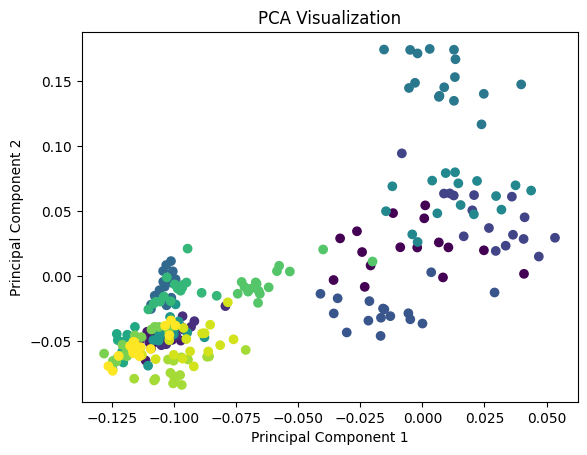

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

X_selected_pca = X_pca[y<=15]

plt.scatter(X_selected_pca[:, 0], X_selected_pca[:, 1], c=y[y<=15], cmap='viridis')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Do the same procedure as in two previous cells, but now for the `TSNE` method from `sklearn.manifold`.

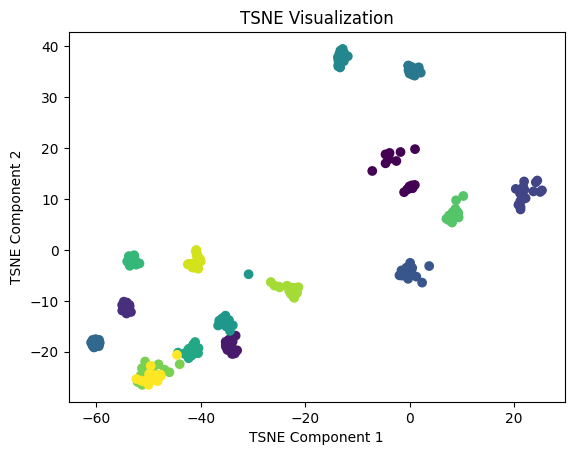

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X)

X_selected_tsne = X_tsne[y<=15]

plt.scatter(X_selected_tsne[:, 0], X_selected_tsne[:, 1], c=y[y<=15], cmap='viridis')
plt.title('TSNE Visualization')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()

**Task 2. <a id="task2"></a> (0.5 points)** Specify the coordinates of the object with index 2 (`X[2]`) after applying the TSNE method. Round the numbers to hundreds.

In [ ]:
coordinates_index_2 = X_tsne[2]
cords_2_tsne = [round(coord, 2) for coord in coordinates_index_2]
print(f"Coordinates of object with index 2 after TSNE: {cords_2_tsne}")

Coordinates of object with index 2 after TSNE: [0.57, 12.13]


**Task 3. <a id="task3"></a> (0.5 points)** Specify the coordinates of the object with index 2 (`X[2]`) after applying the PCA method. Round the numbers to hundreds.

In [ ]:
coordinates_index_2_pca = X_pca[2]
cords_2_pca = [round(coord, 2) for coord in coordinates_index_2_pca]
print(f"Coordinates of object at index 2 after PCA: {cords_2_pca}")

Coordinates of object at index 2 after PCA: [-0.03, 0.03]


**Task 4. <a id="task4"></a> (1 points)** What conclusions can be drawn from the obtained images? Choose the right one(s).

1) Using the principal components method, it was possible to visualize objects on a plane and objects of different classes are visually separable

2) Using the TSNE method, it was possible to visualize objects on a plane and objects of different classes are visually separable

3) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are visually separable

4) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are not visually separable

### Анализ полученных результатов
Наблюдая полученные графики можно сказать, что верным является заключение №2.
TSNE действительно разделил многие классы на небольшие кластеры, которые хорошо видны на графике, в то время как PCA распределил классы на плоскости так, что нельзя явно видеть границы между ними. За счет такого разделения у TSNE  можно сделать выводы о схожести определенных классов по полученным результатам.

**Task 5. (0.5 points)** Again try to fit your simple classifier, this time using transformed data to two-dimensional space. To do it choose the best feature representation in your opinion from two existing. Did the metrics improve?

In [ ]:
X_train_tsne, X_test_tsne, _, _ = train_test_split(X_tsne, y, test_size=0.3, random_state=42)

svm_tsne = SVC(kernel='linear')
svm_tsne.fit(X_train_tsne, y_train)

y_pred_tsne = svm_tsne.predict(X_test_tsne)

accuracy_tsne = accuracy_score(y_test, y_pred_tsne)
f1_tsne = f1_score(y_test, y_pred_tsne, average='weighted')

print(f"Accuracy using t-SNE transformed data: {accuracy_tsne}")
print(f"F-score using t-SNE transformed data: {f1_tsne}")


Accuracy using t-SNE transformed data: 0.6770833333333334
F-score using t-SNE transformed data: 0.6545761212972899


### Анализ полученных реузльтатов
Метрики при обучении обычного классификатора с использованием данных для двух измерений на базе TSNE во много раз улучшились. Это обусловенно тем, что у нас используется линейный классификатор, и для него лучше подходят данные переведенные в два измерения. При этом использовался TSNE, эффективность которого для наших данных уже обсуждалась в 4 номере.

## K_means

**Task 6. <a id="task5"></a> (1.5 points)** Implement the MyKMeans class.

The class must match the template shown below. Please, add code where needed. Some guidelines are the following:

The class constructor is passed to:
- n_clusters - the number of clusters that the data will be split into

- n_iters - the maximum number of iterations that can be done in this algorithm

Realize `update_centers` and `update_labels` methods.


In the `fit` method:

- Write sequential call of `self_centers` and `self_labels`.

then in the loop by the number of iterations you need to implement:
- calculate the nearest cluster center for each object
- recalculate the center of each cluster (the average of each of the coordinates of all objects assigned to this cluster)
put the calculated new cluster centers in the `new_centers` variable

In the `predict` method:

the nearest cluster centers for `X` objects are calculated

In [ ]:
from IPython.display import clear_output
from sklearn.metrics import pairwise_distances_argmin

def plot_clust(X, centers, lables, ax):
    ax.scatter(X[:,0], X[:,1], c=lables)
    ax.scatter(centers[:,0], centers[:,1], marker='>', color='red')


class MyKMeans():
    def __init__(self, n_clusters=3, n_iters=100, seed=None):
        self.n_clusters = n_clusters
        self.labels = None
        self.centers = None
        self.n_iters = n_iters
        self.seed = 0 if seed is None else seed
        np.random.seed(self.seed)

    def update_centers(self, X):
        centers = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            # Set mean value of cluster's points for center of the cluster
            if len(X[self.labels == i]) > 0:
                centers[i] = np.mean(X[self.labels == i], axis=0)
        return centers

    def update_labels(self, X):
        # Calculate Euclidian distance for points in X and centers
        return pairwise_distances_argmin(X, self.centers)

    def fit(self, X):
        self.centers = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        self.labels = self.update_labels(X)

        for it in range(self.n_iters):
            new_labels = self.update_labels(X)
            self.labels = new_labels

            new_centers = self.update_centers(X)
            if np.allclose(self.centers.flatten(), new_centers.flatten(), atol=1e-1):
                self.centers = new_centers
                self.labels = new_labels
                print('Converge by tolerance centers')

                fig, ax = plt.subplots(1,1)
                plot_clust(X, new_centers, new_labels, ax)
                return 0

            self.centers = new_centers

            fig, ax = plt.subplots(1,1)
            plot_clust(X, new_centers, new_labels, ax)
            plt.pause(0.3);
            clear_output(wait=True);


        return 1

    def predict(self, X):
        # Calculate Euclidian distance for points in X and centers
        return pairwise_distances_argmin(X, self.centers)

Generating data for clustering

In [ ]:
from sklearn import datasets
n_samples = 1000

noisy_blobs = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 0.5, 0.5],
                             random_state=0)

In [ ]:
X, y = noisy_blobs

**Task 7. <a id="task6"></a> (1.5 points)**

7.1 Cluster noisy_blobs objects with `MyKMeans`, use the hyperparameters `n_clusters=3`, `n_iters=3`. Plot result. Specify the result label for the object with index 0.

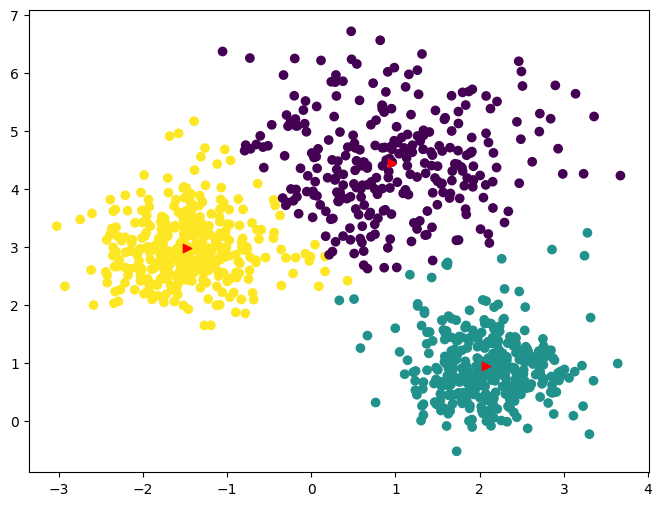

The label for object at index 0 is: 2


In [ ]:
kmeans = MyKMeans(n_clusters=3, n_iters=3, seed=42)

kmeans.fit(X)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_clust(X, kmeans.centers, kmeans.labels, ax)
plt.show()

print(f"The label for object at index 0 is: {kmeans.labels[0]}")


7.2 Cluster noisy_blobs objects, use the hyperparameters `n_clusters=3`, `n_iters = 100`. Plot result. Specify the result label for the object with index 0.

Converge by tolerance centers


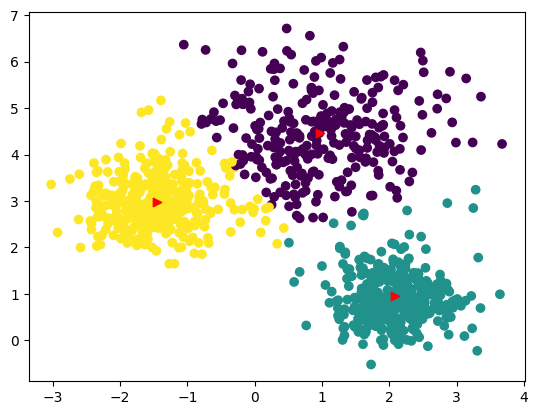

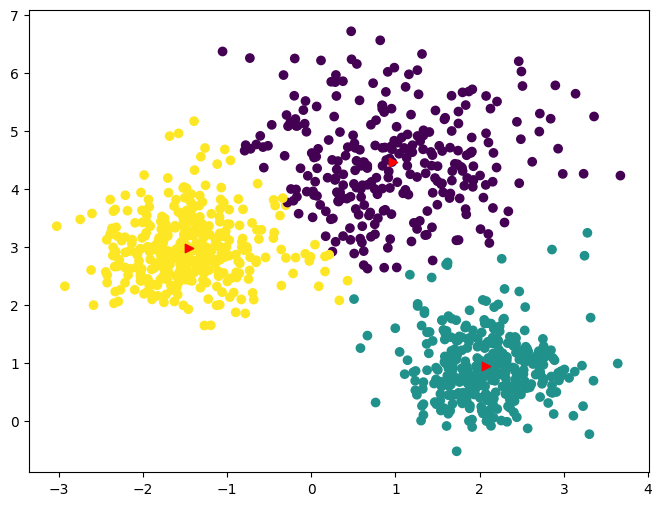

The label for object at index 0 is: 2


In [ ]:
kmeans_long_iters = MyKMeans(n_clusters=3, n_iters=100, seed=42)

kmeans_long_iters.fit(X)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_clust(X, kmeans_long_iters.centers, kmeans_long_iters.labels, ax)
plt.show()

print(f"The label for object at index 0 is: {kmeans_long_iters.labels[0]}")

7.3 Calculate how many objects changed the label of the predicted cluster when changing the hyperparameter n_iters from 3 to 100

In [ ]:
num_of_changed = np.sum(kmeans.labels != kmeans_long_iters.labels)
print(f"The number of objects that changed their predicted cluster label: {num_of_changed}")

The number of objects that changed their predicted cluster label: 4


**Task 8. <a id="task6"></a> (1.5 points)**

Using the elbow method, select the optimal number of clusters, show it on the plot. As a metric, use the sum of the squares of the distances between the data points and the centroids of the clusters assigned to them divided by number of clusters. To do this, iterate the parameter k from 2 to 50 in steps of 2.

Converge by tolerance centers


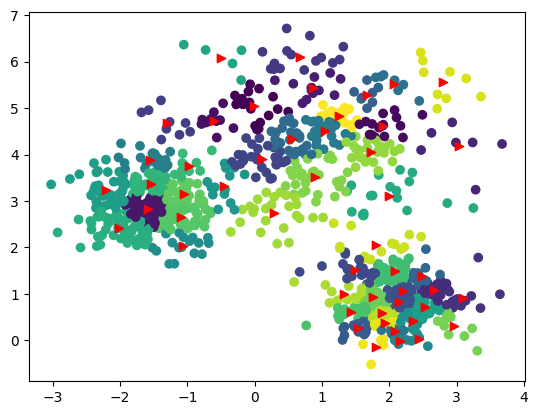

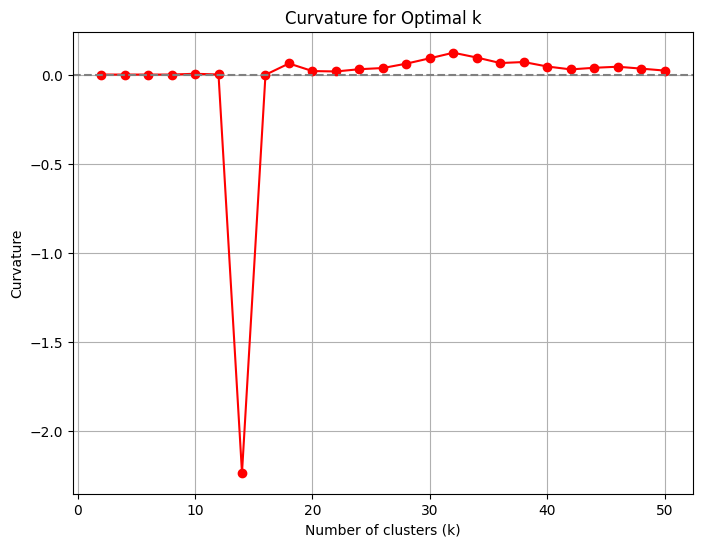

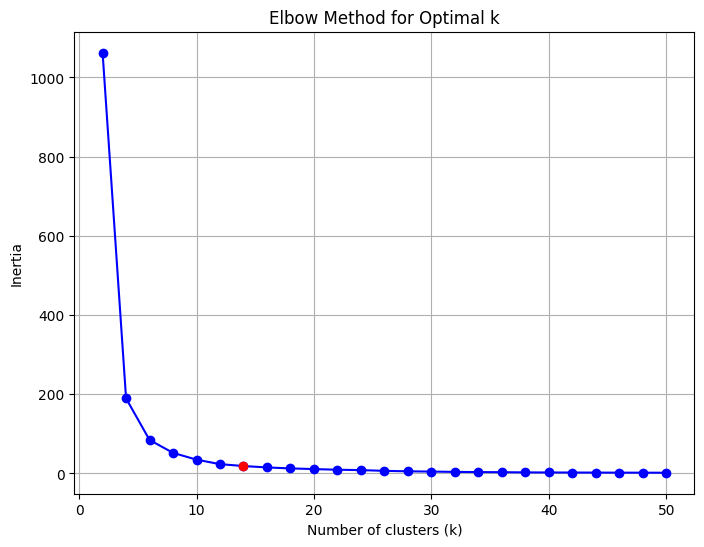

In [ ]:
from scipy.signal import savgol_filter
inertia_values = []
k_values = range(2, 51, 2)

for k in k_values:
    kmeans = MyKMeans(n_clusters=k, n_iters=100, seed=42)
    kmeans.fit(X)

    # Calculate inertia(required metric) and save results
    inertia = np.sum((X - kmeans.centers[kmeans.labels]) ** 2) / k
    inertia_values.append(inertia)

# Smooth the inertia curve using Savitzky-Golay filter to reduce noise
smoothed = savgol_filter(inertia_values, 9, 2)

# Calculate and plot the curvature
curvature = np.gradient(np.gradient(smoothed)) / (1 + np.gradient(smoothed)**2)**(3/2)
plt.figure(figsize=(8, 6))
plt.plot(k_values, curvature, marker='o', linestyle='-', color='r')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Curvature')
plt.title('Curvature for Optimal k')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

plt.plot(k_values[6], inertia_values[6], 'ro')
plt.show()

### Пояснение
Дополнительно был построен график вторых производных для разных значений количества кластеров. На графике с elbow method нету явной точки излома. Предположительно она располагается где-то между 6 и 18. Будем считать таковой точку для которой значение производной первый раз изменило знак, то есть в точке со значением 14. Если смотреть чисто визуально, то неплохо подходит точка со значением 6 в качестве elbow point.

## DBSCAN

**Task 9. <a id="task7"></a> (0.5 points)** Cluster noisy_blobs objects using DBSCAN. Use the DBSCAN implementation from sklearn. Fix the `eps=0.3` hyperparameter. Plot result. Specify the response for the object with index 2.

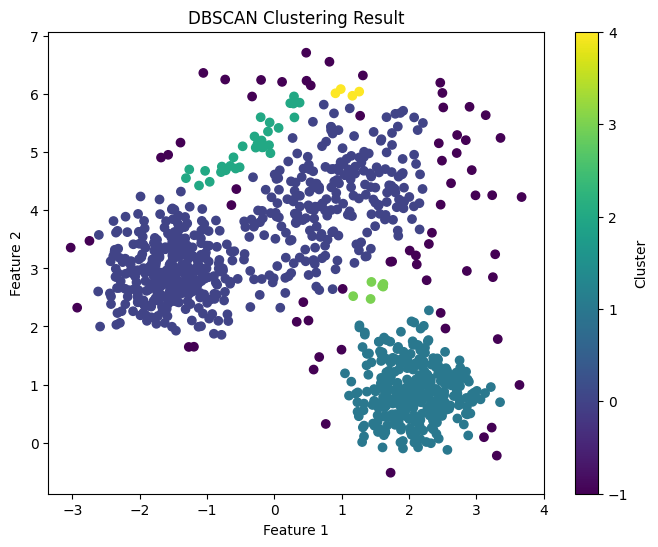

The label for object at index 2 is: 0


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3)
cluster_labels = dbscan.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

print(f"The label for object at index 2 is: {cluster_labels[2]}")

**Task 10. <a id="task8"></a> (1 point)**

Try different settings of ```eps``` distances (from 0.1 to 0.5) and several values of your choice of ```min_samples```. For each setting plot results. Also output the number of clusters and outliers (objects marked as -1).

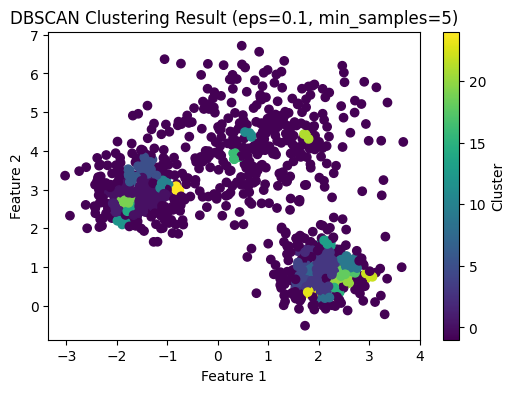

eps=0.1, min_samples=5
Number of clusters: 25
Number of outliers: 567



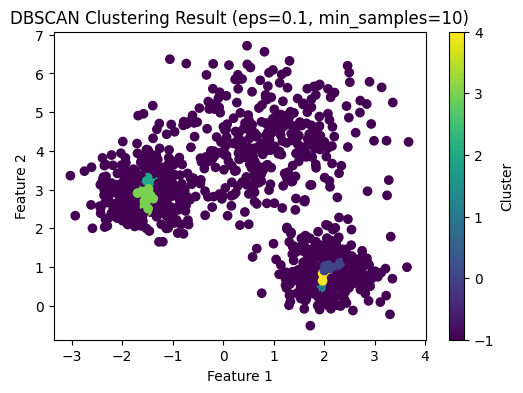

eps=0.1, min_samples=10
Number of clusters: 5
Number of outliers: 902



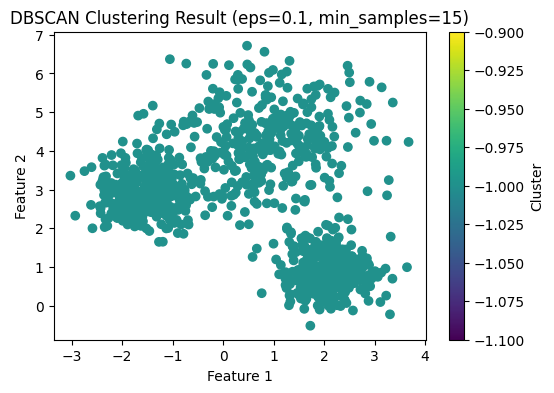

eps=0.1, min_samples=15
Number of clusters: 0
Number of outliers: 1000



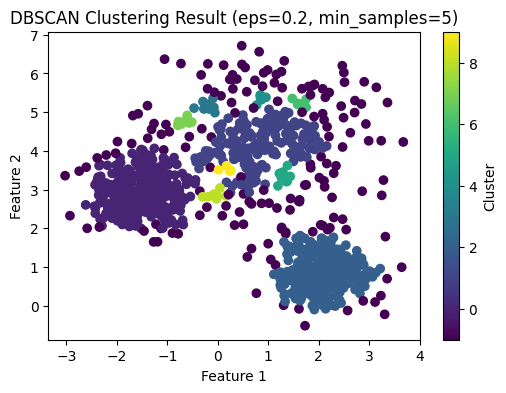

eps=0.2, min_samples=5
Number of clusters: 10
Number of outliers: 161



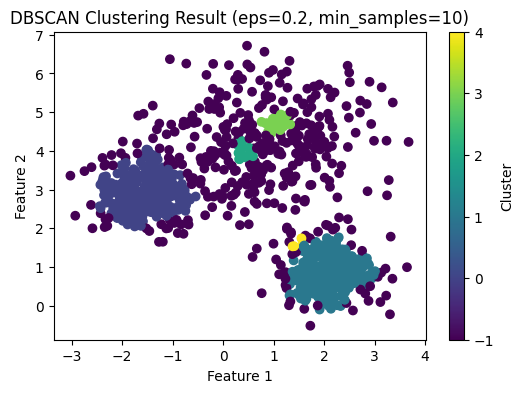

eps=0.2, min_samples=10
Number of clusters: 5
Number of outliers: 387



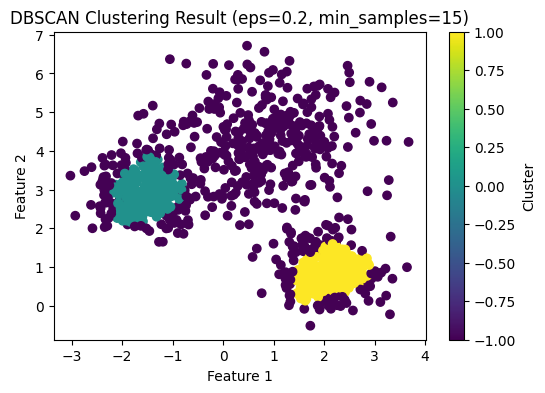

eps=0.2, min_samples=15
Number of clusters: 2
Number of outliers: 536



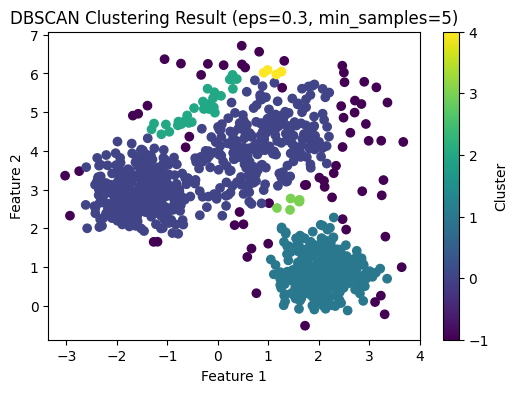

eps=0.3, min_samples=5
Number of clusters: 5
Number of outliers: 65



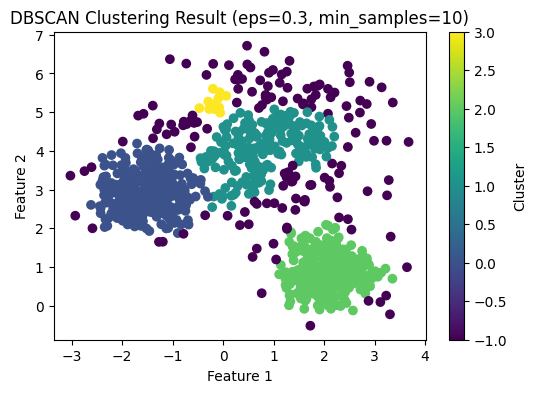

eps=0.3, min_samples=10
Number of clusters: 4
Number of outliers: 145



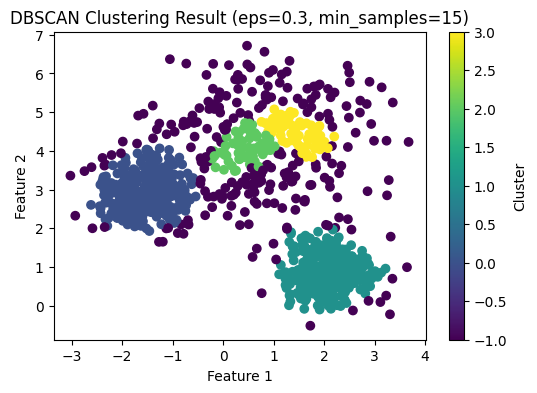

eps=0.3, min_samples=15
Number of clusters: 4
Number of outliers: 241



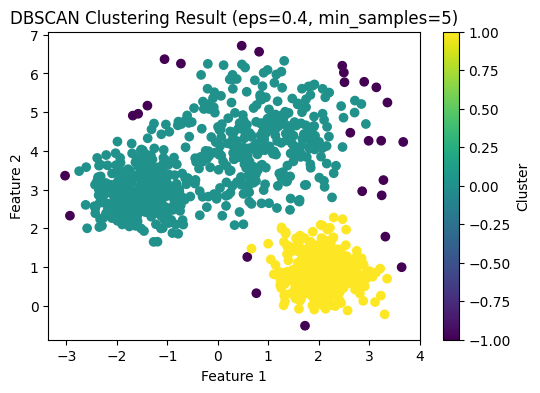

eps=0.4, min_samples=5
Number of clusters: 2
Number of outliers: 27



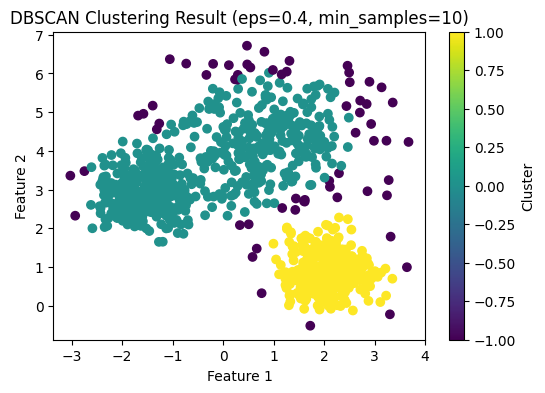

eps=0.4, min_samples=10
Number of clusters: 2
Number of outliers: 61



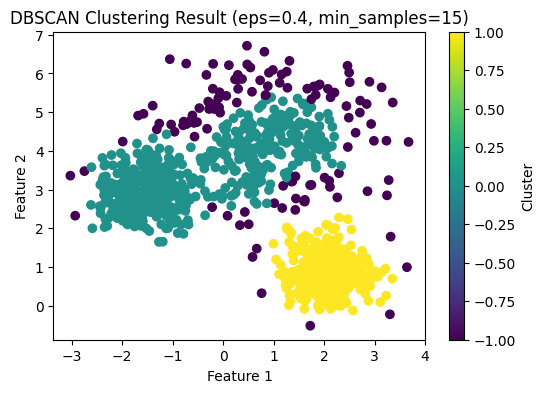

eps=0.4, min_samples=15
Number of clusters: 2
Number of outliers: 119



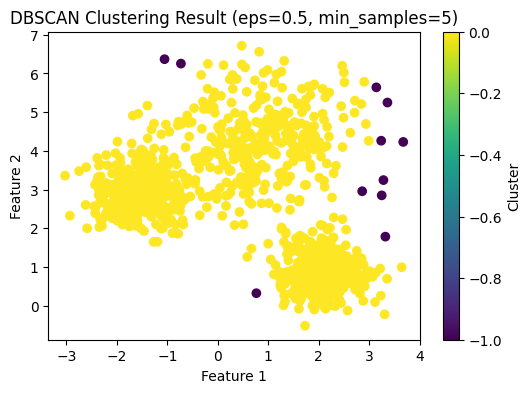

eps=0.5, min_samples=5
Number of clusters: 1
Number of outliers: 11



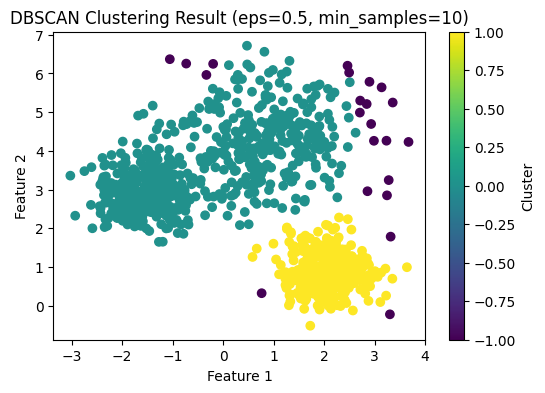

eps=0.5, min_samples=10
Number of clusters: 2
Number of outliers: 22



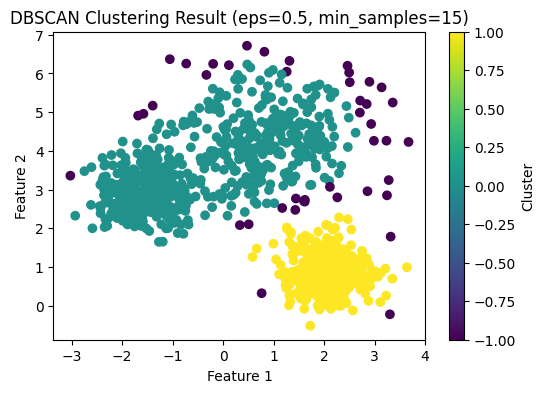

eps=0.5, min_samples=15
Number of clusters: 2
Number of outliers: 42



In [ ]:
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_values = [5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X)

        # Count number of clusters and outliers
        num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        num_outliers = list(cluster_labels).count(-1)

        plt.figure(figsize=(6, 4))
        plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
        plt.title(f'DBSCAN Clustering Result (eps={eps}, min_samples={min_samples})')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.colorbar(label='Cluster')
        plt.show()

        print(f'eps={eps}, min_samples={min_samples}')
        print(f'Number of clusters: {num_clusters}')
        print(f'Number of outliers: {num_outliers}\n')
